# Analyzing recommendation letters with CorrNet

## Importing the package

In [33]:
import corrnet
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Loading the letter data

In [3]:
letter_manager = corrnet.LetterManager('data/letter_data.csv', date_col='Date',
                                       sender_col='Sender', addressee_col='Receiver',
                                       attribute_cols=['Written for', 'Institution', 'Recommendation Type', 'Success'], show_warnings=True)

## Plotting the date distribution split by institutions

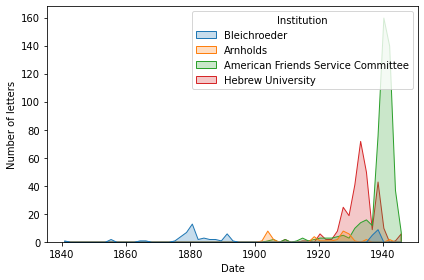

In [4]:
_ = letter_manager.plot_date_distribution(split_attribute='Institution', save_as='date-distr.pdf')

## Displaying numbers of letters split by institution

In [5]:
letter_manager.letter_data().value_counts('Institution', dropna=False)

Institution
American Friends Service Committee    505
Hebrew University                     298
Bleichroeder                           61
Arnholds                               39
dtype: int64

## Displaying numbers of letters split by success status

In [6]:
letter_manager.letter_data().value_counts('Success', dropna=False)

Success
NaN      605
True     150
False    148
dtype: int64

## Constructing networks for letters targeting the HU

In [4]:
digraph_hu, multi_digraph_hu, line_graph_hu = letter_manager.construct_graphs(filter_by=('Institution', 'Hebrew University'))

## Computing some network properties

In [4]:
corrnet.compute_network_properties(digraph_hu, multi_digraph_hu, line_graph_hu)

,Network type,Num nodes,Num edges,Num WCCs,Size LWCC
0,Digraph,242,250,24,163
1,Multi-digraph,242,298,24,163
2,Directed line graph,298,3117,66,223
3,Undirected line graph,298,3054,66,223


## Differential in-centrality analysis

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

True vs. False: Mann-Whitney-Wilcoxon test two-sided, P_val:1.544e-04 U_stat=4.676e+03
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

True vs. False: Mann-Whitney-Wilcoxon test two-sided, P_val:3.779e-05 U_stat=9.600e+02
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

True vs. False: Mann-Whitney-Wilcoxon test two-sided, P_val:8.793e-05 U_stat=4.715e+03
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

True vs. False:

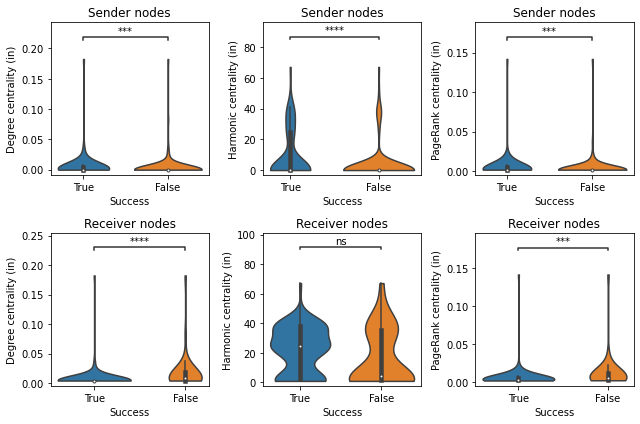

In [5]:
_ = corrnet.differential_centrality_analysis(digraph_hu, multi_digraph_hu, 'Success', 'in', save_as='in-centrality-analysis-hu.pdf')

## Differential out-centrality analysis

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

False vs. True: Mann-Whitney-Wilcoxon test two-sided, P_val:3.476e-03 U_stat=3.029e+03
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

False vs. True: Mann-Whitney-Wilcoxon test two-sided, P_val:2.341e-01 U_stat=1.764e+03
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

False vs. True: Mann-Whitney-Wilcoxon test two-sided, P_val:5.273e-02 U_stat=3.058e+03
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

False vs. True:

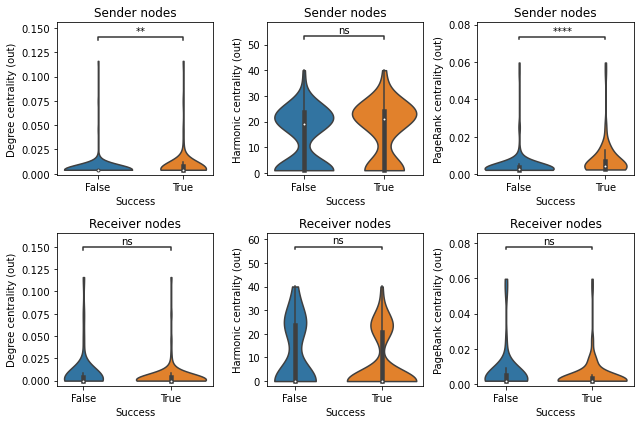

In [14]:
_ = corrnet.differential_centrality_analysis(digraph_hu, multi_digraph_hu, 'Success', 'out', save_as='out-centrality-analysis-hu.pdf')

## Semi-supervised analysis

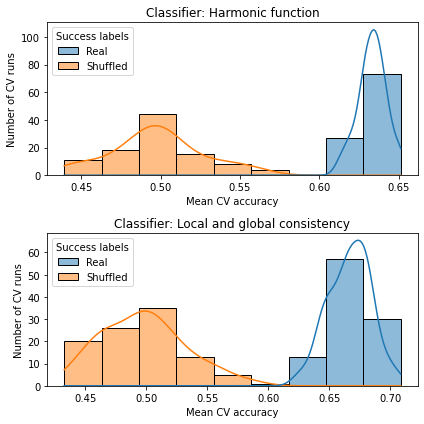

In [13]:
_ = corrnet.semi_supervised_analysis(line_graph_hu, 'Success', save_as='semi-supervised-analysis-hu.pdf')

## Judah Magnes

### Compute in-centralities

In [55]:
pr_centralities = corrnet.compute_centralities(digraph_hu, centrality_measure='PageRank centrality', direction='in', as_sorted_list=True)
pr_centralities = [t for t in pr_centralities if digraph_hu.in_degree(t[0]) > 0]
deg_centralities = corrnet.compute_centralities(digraph_hu, centrality_measure='Degree centrality', direction='in', as_sorted_list=True)
deg_centralities = [t for t in deg_centralities if digraph_hu.in_degree(t[0]) > 0]
harmonic_centralities = corrnet.compute_centralities(digraph_hu, centrality_measure='Harmonic centrality', direction='in', as_sorted_list=True)
harmonic_centralities = [t for t in harmonic_centralities if digraph_hu.in_degree(t[0]) > 0]

In [56]:
pr_centralities[0]

('Magnes Judah Leon', 0.14200549418364797)

In [9]:
deg_centralities[0]

('Magnes Judah Leon', 0.1825726141078838)

In [10]:
harmonic_centralities[0]

('Magnes Judah Leon', 67.16666666666666)

**Observation:** Judah Magnes (the head of the HU) is node with maximum in-centrality w.r.t. all three tested centrality measures.

### Compute success ratios for all receiver nodes.

In [57]:
success_ratios = {}
for node in multi_digraph_hu.nodes:
    all_letters = [edge for edge in multi_digraph_hu.edges(data=True) if edge[1] == node]
    successful_letters = [edge for edge in all_letters if edge[2]['Success']]
    if len(all_letters) > 0:
        success_ratios[node] = len(successful_letters) / len(all_letters)
success_ratio_magnes = success_ratios['Magnes Judah Leon']
success_ratios = np.array(list(success_ratios.values()), dtype=float)

In [58]:
np.mean(success_ratios)

0.7296605970519013

In [50]:
np.median(success_ratios)

1.0

In [59]:
success_ratio_magnes

0.42028985507246375

**Observation:** Success ratio for Judah Magnes is significantly lower than average.

### Plot the results

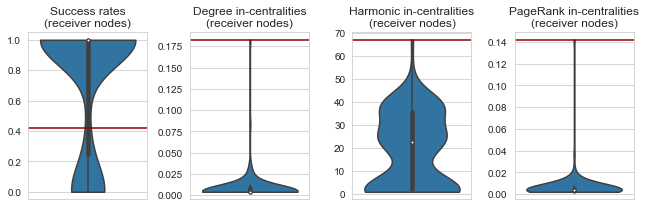

In [67]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(9,3))
sns.violinplot(y=success_ratios, cut=0, ax=axes[0])
axes[0].axhline(y=success_ratio_magnes, color='darkred')
axes[0].set_title('Success rates\n(receiver nodes)')
sns.violinplot(y=[t[1] for t in deg_centralities], cut=0, ax=axes[1])
axes[1].axhline(y=deg_centralities[0][1], color='darkred')
axes[1].set_title('Degree in-centralities\n(receiver nodes)')
sns.violinplot(y=[t[1] for t in harmonic_centralities], cut=0, ax=axes[2])
axes[2].axhline(y=harmonic_centralities[0][1], color='darkred')
axes[2].set_title('Harmonic in-centralities\n(receiver nodes)')
sns.violinplot(y=[t[1] for t in pr_centralities], cut=0, ax=axes[3])
axes[3].axhline(y=pr_centralities[0][1], color='darkred')
axes[3].set_title('PageRank in-centralities\n(receiver nodes)')
fig.tight_layout()
fig.savefig('judah-magnes.pdf')